## NSMC로 감정 분석(텍스트 분류) 하기

### 3. scikit-learn으로 NSMC 감정분석 하기

In [1]:
def read_documents(filename): 
    with open(filename, encoding='utf-8') as f:  #파일 열기함수
        documents = [line.split('\t') for line in f.read().splitlines()]
        #데이터가 tap기준으로 되어있기때문에 
        documents = documents[1:]
        #첫번째줄은 id나 그런것들 있어서 
        
    return documents
    
train_docs = read_documents("./ratings_train.txt")
test_docs = read_documents("./ratings_test.txt")
#read_documents라는 함수를 지정하고 안에 with open을 통해 utf-8형식으로 인코딩하여 텍스트파일들을 로드 

In [2]:
train_docs
#리스트안에 리스트형식으로 되어있으며 탭을 기준으로 id, 리뷰, 라벨 형식으로 지정 

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1'],
 ['5403919', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '0'],
 ['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0'],
 ['9443947',
  '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
  '0'],
 ['7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1'],
 ['5912145', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?', '1'],
 ['9008700', '걍인피니트가짱이다.진짜짱이다♥', '1'],
 ['10217543', '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~', '1'],
 ['5957425', '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해', '0'],
 ['8628627', '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.', '1'],
 ['9864035', '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지', '0'],
 ['6852435', 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ', '1'],
 ['9143163',
  '참 사람들 웃긴게 

In [3]:
print(len(train_docs))
print(len(test_docs))

150000
50000


###  데이터 설명 
#### 영화당 100개의 리뷰들을 수집하여 총 200,000개의 리뷰로 이루어져있음
#### 학습에 15만개 테스트에 5만개의 데이터가 존재 
#### lable은 긍정이 0 부정이 1을 나타낸다
#### 긍정은 평점 9,10점으로 구성
#### 부정은 평점 1,2,3,4점으로 구성 

In [4]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
        
    return doc
     
#한글을 제외한 모든것들을 없애준다

In [5]:
def define_stopwords(path):
    
    SW = set() # SW에 불용어를 집합형태로 넣어줌 (집합은 중복되는 것들은 제외해주는 특성이 존재 )
    # 불용어를 추가하는 방법 
    # 예시 : SW.add("있다")
    
    with open(path) as f:  
        for word in f:  
            SW.add(word)
            
    return SW
#open함수를 통해 파일을 열어서 f에 저장을 하고 반복문을 사용하여 f안의 word를 SW에 추가

In [6]:
def text_tokenizing(doc):
    return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]

#mecab을 이용하여 형태소를 추출하는데 조건이 SW안에 들어있으면 안되며 글자수가 1개초과인것들만 저장

# wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]
#nouns : 명사 추출, morphs : 형태소 추출 ,pos : 품사 부착

In [7]:
a = train_docs[1:10]

In [8]:
a

[['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1'],
 ['5403919', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '0'],
 ['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0'],
 ['9443947',
  '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
  '0'],
 ['7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1'],
 ['5912145', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?', '1']]

In [9]:
#텍스트 클리닝과 텍스트 토큰화
from konlpy.tag import Mecab
#from konlpy.tag import Okt 보통의 경우에는 Okt를 사용하지 x
import json
import os
import re
from pprint import pprint

#okt = Okt()
mecab = Mecab()

SW = define_stopwords("./stopwords-ko.txt") # 불용어들을 SW에 저장 

if os.path.exists('train_docs.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
    with open("train_docs.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
        train_data = json.load(f)
else:
    #토큰화와 클리닝까지 
    #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
    #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
    #클리닝을 먼저하고 토큰화를 하는게 좋다 
    train_data =[(text_tokenizing(text_cleaning(line[1])), line[2])for line in train_docs if text_tokenizing(text_cleaning(line[1]))]
    #클리닝을 넣고 토큰화진행  
    #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
    with open("train_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
if os.path.exists('test_docs.json'):
    with open("test_docs.json", encoding='utf-8') as f:
        test_data = json.load(f)
else:
    test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
    #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
    with open("test_docs.json", 'w', encoding='utf-8') as f:
        json.dump(test_data, f, ensure_ascii=False, indent='\t')

pprint(train_data[0])
pprint(test_data[0])

[['진짜', '짜증', '네요', '목소리'], '0']
[['평점', '나쁘', '지만', '짜리', '더더욱', '아니', '잖아'], '0']


### 위 코드 분석
#### ===================================

In [10]:
for line in a:
    print(line)

['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1']
['10265843', '너무재밓었다그래서보는것을추천한다', '0']
['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0']
['6483659', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '1']
['5403919', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '0']
['7797314', '원작의 긴장감을 제대로 살려내지못했다.', '0']
['9443947', '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네', '0']
['7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1']
['5912145', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?', '1']


In [11]:
for line in a:
    print(line[1])
#line[1]을 쓰는 이유가 리뷰데이터는 line[1]에 존재하기 떄문에 

흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
너무재밓었다그래서보는것을추천한다
교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
원작의 긴장감을 제대로 살려내지못했다.
별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네
액션이 없는데도 재미 있는 몇안되는 영화
왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?


In [12]:
for line in a:
    if line[1]:
        c=text_tokenizing(line[1])
        print(c)
print(" 토큰화한 C의 길이 : ",len(c))
#위의 토큰화의 과정을 표본으로 구현
#원래 10개의 표본을 가지고 리뷰들을 토큰화하였는데 최종적으로 7개의 리스트만 나왔음
#10개의 표본중에서 ㅋㅋㅋ나 ....같은것들이 포함되었기때문에 형태소로 토큰화되지 못하고 그냥 삭제된것을 확인 

['..', '포스터', '보고', '초딩', '영화', '...', '오버', '연기', '조차', '가볍', '구나']
['너무', '밓었다그래서보는것을추천한다']
['교도소', '이야기', '구먼', '솔직히', '재미', '평점', '조정']
['사이몬페그', '익살', '스런', '연기', '돋보였', '영화', '스파이더맨', '에서', '보이', '커스틴', '던스트', '너무나', '이뻐', '보였']
['걸음마', '부터', '초등', '학교', '학년', '영화', 'ㅋㅋㅋ', '..', '별반', '아까움']
['원작', '긴장감', '제대로', '살려', '못했']
['반개', '아깝', '나온다', '이응경', '길용우', '연기', '생활', '인지', '정말', '해도', '그것', '보단', '납치', '감금', '반복', '반복', '드라마', '가족', '연기', '사람', '모엿']
['액션', '는데', '재미', '영화']
['평점', '건데', '만한데', '헐리우드', '화려', '너무', '길들여져']
 토큰화한 C의 길이 :  7


#### ======================================

In [13]:
print(len(train_docs))
print(len(train_data))
print(len(test_docs))
print(len(test_data))
#클리닝하기전과 클리닝하고 난 후의 차이 

150000
146469
50000
48876


In [14]:
print(train_data[:3])

[[['진짜', '짜증', '네요', '목소리'], '0'], [['포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍', '구나'], '1'], [['너무', '밓었다그래서보는것을추천한다'], '0']]


In [15]:
import nltk

total_tokens = [token for doc in train_data for token in doc[0]]
#total_tokens는 train을 토큰으로 변환 
print(len(total_tokens))

1138353


### 위 코드 분석
#### ======================================

In [16]:
f=train_data[1:10]
print(f)

[[['포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍', '구나'], '1'], [['너무', '밓었다그래서보는것을추천한다'], '0'], [['교도소', '이야기', '구먼', '솔직히', '재미', '평점', '조정'], '0'], [['사이몬페그', '익살', '스런', '연기', '돋보였', '영화', '스파이더맨', '에서', '보이', '커스틴', '던스트', '너무나', '이뻐', '보였'], '1'], [['걸음마', '부터', '초등', '학교', '학년', '살용', '영화', 'ㅋㅋㅋ', '별반', '아까움'], '0'], [['원작', '긴장감', '제대로', '살려', '못했'], '0'], [['반개', '아깝', '나온다', '이응경', '길용우', '연기', '생활', '인지', '정말', '해도', '그것', '보단', '납치', '감금', '반복', '반복', '드라마', '가족', '연기', '사람', '모엿'], '0'], [['액션', '는데', '재미', '영화'], '1'], [['평점', '건데', '한데', '헐리우드', '화려', '너무', '길들여져'], '1']]


In [17]:
for doc in f:
    #print(doc[0])라벨값을 제외하기 위해 사용 
    for token1 in doc[0]:
        print(token1)
#라벨을 제외한 토큰들만 분리 


포스터
보고
초딩
영화
오버
연기
조차
가볍
구나
너무
밓었다그래서보는것을추천한다
교도소
이야기
구먼
솔직히
재미
평점
조정
사이몬페그
익살
스런
연기
돋보였
영화
스파이더맨
에서
보이
커스틴
던스트
너무나
이뻐
보였
걸음마
부터
초등
학교
학년
살용
영화
ㅋㅋㅋ
별반
아까움
원작
긴장감
제대로
살려
못했
반개
아깝
나온다
이응경
길용우
연기
생활
인지
정말
해도
그것
보단
납치
감금
반복
반복
드라마
가족
연기
사람
모엿
액션
는데
재미
영화
평점
건데
한데
헐리우드
화려
너무
길들여져


In [18]:
total_tokens1 = [token1 for doc in f for token1 in doc[0]]
print(len(total_tokens1))
#총 79개의 토큰이 있음 

79


#### =====================================

In [19]:
text = nltk.Text(total_tokens, name='NMSC')
# nltk.Text 텍스트를 사용하기위해서 꼭 사용
print(len(set(text.tokens)))
#set은 중복이 날라감 
pprint(text.vocab().most_common(10))
#text의 가장 많은 10개의 단어를 출력 
#social data는 특수문자나 숫자도 이런거 그냥 바로 날리면 안된다
#빈도분석을 통해 특수문자나 숫자등이 많이 나오면 그 의미들을 해석하고 삭제여부 결정 
#48018개의 토큰이 존재한다 

48022
[('영화', 57601),
 ('는데', 11464),
 ('너무', 11013),
 ('정말', 9779),
 ('으로', 9314),
 ('재밌', 8988),
 ('네요', 8979),
 ('지만', 8654),
 ('진짜', 8327),
 ('에서', 8064)]


### 위 코드 분석 
#### =================================

In [20]:
text1 = nltk.Text(total_tokens1, name='Example')
print(len(set(text1.tokens)))
#79개에서 69개로 중복된 단어들은 제외된것을 확인 

69


#### =============================

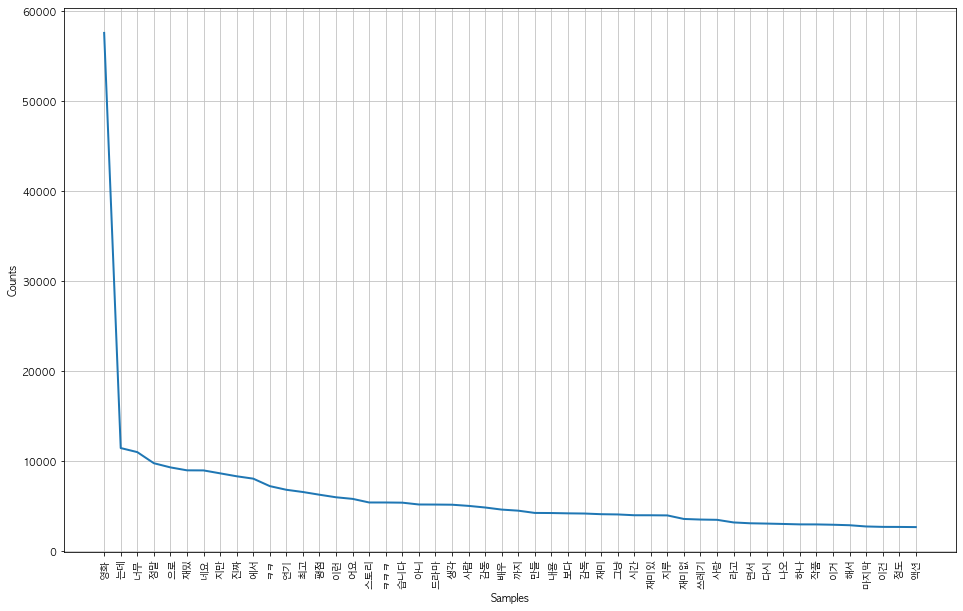

In [21]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin': # 맥이면 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우면 
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)
#50개의 토큰들의 빈도를 보여준다 

In [22]:
# 여러 리스트들을 하나로 묶어 주는 함수입니다.
def list_to_str(List): 
    return " ".join(List)

In [23]:
train_data

[[['진짜', '짜증', '네요', '목소리'], '0'],
 [['포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍', '구나'], '1'],
 [['너무', '밓었다그래서보는것을추천한다'], '0'],
 [['교도소', '이야기', '구먼', '솔직히', '재미', '평점', '조정'], '0'],
 [['사이몬페그',
   '익살',
   '스런',
   '연기',
   '돋보였',
   '영화',
   '스파이더맨',
   '에서',
   '보이',
   '커스틴',
   '던스트',
   '너무나',
   '이뻐',
   '보였'],
  '1'],
 [['걸음마', '부터', '초등', '학교', '학년', '살용', '영화', 'ㅋㅋㅋ', '별반', '아까움'], '0'],
 [['원작', '긴장감', '제대로', '살려', '못했'], '0'],
 [['반개',
   '아깝',
   '나온다',
   '이응경',
   '길용우',
   '연기',
   '생활',
   '인지',
   '정말',
   '해도',
   '그것',
   '보단',
   '납치',
   '감금',
   '반복',
   '반복',
   '드라마',
   '가족',
   '연기',
   '사람',
   '모엿'],
  '0'],
 [['액션', '는데', '재미', '영화'], '1'],
 [['평점', '건데', '한데', '헐리우드', '화려', '너무', '길들여져'], '1'],
 [['걍인피니트가짱이다진짜짱이다'], '1'],
 [['마다', '눈물나', '향수', '자극', '허진호', '감성', '절제', '멜로', '달인'], '1'],
 [['면서', '손들', '횡단', '보도', '건널', '뛰쳐나올', '이범수', '연기', '드럽', '못해'], '0'],
 [['담백', '깔끔', '해서', '신문', '기사', '보다', '자꾸', '잊어버린다', '사람', '다는'], '1'],
 [['취향',
   '존중',
 

### 4. Linear Classifier와 Support Vector Machine으로 nsmc 분류하기

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import numpy as np

#학습을 위해 데이터셋 모양 통일하기 
train_x = [list_to_str(doc) for doc, _ in train_data] # _이거는 뭘까  
#doc는 리스트를 토큰화된 원소들을 train_x
test_x = [list_to_str(doc) for doc, _ in test_data]
train_y = [label for _, label in train_data]
#label
test_y = [label for _, label in test_data]

#print(len(train_x), len(train_y))
print("For %d train data" % len(train_x))
#print(len(test_x), len(test_y))
train_x#토큰화된 train_data의 리뷰들 

For 146469 train data


['진짜 짜증 네요 목소리',
 '포스터 보고 초딩 영화 오버 연기 조차 가볍 구나',
 '너무 밓었다그래서보는것을추천한다',
 '교도소 이야기 구먼 솔직히 재미 평점 조정',
 '사이몬페그 익살 스런 연기 돋보였 영화 스파이더맨 에서 보이 커스틴 던스트 너무나 이뻐 보였',
 '걸음마 부터 초등 학교 학년 살용 영화 ㅋㅋㅋ 별반 아까움',
 '원작 긴장감 제대로 살려 못했',
 '반개 아깝 나온다 이응경 길용우 연기 생활 인지 정말 해도 그것 보단 납치 감금 반복 반복 드라마 가족 연기 사람 모엿',
 '액션 는데 재미 영화',
 '평점 건데 한데 헐리우드 화려 너무 길들여져',
 '걍인피니트가짱이다진짜짱이다',
 '마다 눈물나 향수 자극 허진호 감성 절제 멜로 달인',
 '면서 손들 횡단 보도 건널 뛰쳐나올 이범수 연기 드럽 못해',
 '담백 깔끔 해서 신문 기사 보다 자꾸 잊어버린다 사람 다는',
 '취향 존중 한다지만 진짜 내생 극장 에서 영화 가장 감동 스토리 거지 감동 어거지',
 '매번 긴장 ㅠㅠ',
 '사람 웃긴 바스코 이기면 락스 라고 바비 이기 아이돌 라고 깐다 그냥 어서 안달 처럼 보인다',
 '굿바이 레닌 표절 이해 는데 갈수록 재미없',
 '이건 정말 깨알 캐스팅 질퍽 산뜻 내용 구성 러진 깨알',
 '약탈자 위한 변명 저놈 착한 절대 아닌걸요',
 '나름 심오 그냥 학생 선생 놀아나 영화 절대 아님',
 '면서 가능',
 '재미없 지루 음식 영화 인데 바베트 만찬 차이 바베트 만찬 이야기 음식 재미 는데 이건 음식 별로 나오 핀란드 풍경 라도 구경 는데 그것 별로 나옴 ㅡㅡ',
 '절대 평범 영화 아닌 수작 라는 말씀 드립니다',
 '주제 은데 중반 부터 지루',
 '짤랐 그래서 납득 그럴 그랬 꺼야',
 '고추 버려야 할텐데',
 '카밀라벨 발연기',
 '센스 연출력 탁월 캐스팅 향수 그래서',
 '포스 위력 다시 깨닫 적남 검사 연기 정말 어요 완전 명품 드라마',
 '쓰레기 진부 됌ㅋㅋ 시간 아까워',
 '재밌 는데 별점 이리 은

In [25]:
train_y

['0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0'

In [45]:

learner = Pipeline([
    ('vect', CountVectorizer()), #max_features= 숫자 숫자만큼 자르겠다 , min_df =5 하위 5개 이하단어는 자르겠다 등등 많다 
    ('clf', SGDClassifier(loss='perceptron', penalty='l2',
                         alpha=1e-4, random_state=42,
                         max_iter=100)) # 이파라미터들을 조정하면서 결과출력
])

learner2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC(kernel='linear')) 
    #svm장점은 데이터에 노이즈가 많거나 데이터의 분포가 선형으로 분류가 불가능하더라도
    #커널을 사용하면 선형으로 분류할 수 있는 공간으로 가능하기 때문 
    #단점은 텍스트데이터에서는 어떤 커널을 사용해야하는지 알 수 없다 
    #그래서 커널들을 각각 다 넣어줘야한다 
])

learner3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC(kernel='poly', degree=8))#clf은 classfier
    #poly는 degree(차원)를 줘야한다 
])

learner4 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC(kernel='rbf'))
])

learner5 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC(kernel='sigmoid'))
])

learner6 = Pipeline([
    ('vect', CountVectorizer()),
    ('mb', MultinomialNB()) #나이브베이즈모델도 생각보다 성능이 좋다 
])

#학습기 정하기 
#이렇게 파이프라인을 쓰면 숫자만 변경해주면 되므로 굉장히 좋다 
#learner2,3,4,5는 시간이 너무 많이 걸려서 못함
classifier = learner

#실제 학습 
classifier.fit(train_x, train_y)
train_predict = classifier.predict(train_x)
train_accuracy = np.mean(train_predict == train_y)
#accuracy는 예측값과 실제값을 평균을 낸게 실제 예측값이다 

test_predict = classifier.predict(test_x)
test_accuracy = np.mean(test_predict == test_y)


print("For %d test data" % len(test_x))

print("Training Accuracy : %.2f" % train_accuracy)
print("Test Accuracy : %.2f" % test_accuracy)

For 48876 test data
Training Accuracy : 0.85
Test Accuracy : 0.78


#학습기 정하기 
classifier = learner2

#실제 학습 
classifier.fit(train_x, train_y)
train_predict = classifier.predict(train_x)
train_accuracy = np.mean(train_predict == train_y)
#accuracy는 예측값과 실제값을 평균을 낸게 실제 예측값이다 

test_predict = classifier.predict(test_x)
test_accuracy = np.mean(test_predict == test_y)


print("For %d test data" % len(test_x))

print("Training Accuracy : %.2f" % train_accuracy)
print("Test Accuracy : %.2f" % test_accuracy)

### < 결과 >

#### Linear Classifier 학습하여, test accuracy를 측정. (learner)

1. 명사만 추출 : 0.51 (이진 분류인데 거의 찍고 있다는 뜻)
2. 전처리 하지 않고 토큰화 하여 형태소 분석 : 0.67
3. 전처리(클리닝) 하고 토큰화 하여 형태소 분석 : 0.71

4. 결론 : 명사만 추출하는 분석은 nsmc분류에서는 큰 의미를 두지 못한다
         전처리를 하고 안하고에 따라 성능이 크게 올라간다
         
-----시간이 많이 걸려서 top 500 features만 사용--------
5. 모든 feature를 사용하여 전처리와 클리닝을 했을때 분석 결과  : 0.76
6. 몇개만 추출하여 분석하는 것보다는 전부 다 넣어서 분석을 했을때가 결과가 더 좋음

### < 결과 >

#### SVM Classifier 학습하여, test accuracy를 측정. (learner2)

1. 명사만 추출 : 0.53
2. 전처리 하지 않고 형태소 분석 : 0.72
3. 전처리 하고 형태소 분석 : 0.77

-----시간이 많이 걸려서 top 500 features만 사용--------
4. 모든 feature를 사용하여 전처리와 클리닝을 했을때 분석 결과  : 0.81
5. SVM이 확실히 성능은 좋지만 분석에 소요되는 시간이 너무 많이 걸림 

### Deep Neural Network

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer #텍스트 전처리 함수
from tensorflow.keras.layers import Embedding, Dense, LSTM #네트워크 구성하기위해 사용(중요) LSTM자리에 RNN등이나 넣을수있음
from tensorflow.keras.models import Sequential 
# sequential: 케라스로 모델을 만들때 sequential이라는 오브젝트를 만들고 오브젝트에다가 layer를 추가해주는형식
from tensorflow.keras.preprocessing.sequence import pad_sequences
#LSTM은 셀단위이므로 텍스트의 길이가 다르므로 텍스트의 길이가 다른것들을 체크해주기 위해 최대길이를 설정하는데 
#텍스트가 최대길이보다 짧을수있으므로 짧은 텍스트를 채워주는 함수가 pad_sequences



### Set Hyperparameter

In [27]:
max_words = 35000 
#현재 16만개정도의 데이터가 있으므로 이걸 Feature로 넣으면 데이터가 너무 많으므로 
#불필요한 데이터를 자르기 위해 35000으로 설정 
max_len = 30
#네트워크의 최대길이(문서의 최대길이 단어의 개수라고 생각하면 됨 )
batch_size = 128
#보통은 32의 배수로 사용 배치사이즈가 커지면 gpu사용량이 증가한다
EPOCHS = 20
#전체 학습횟수 높으면 오래걸림 

### Define Network Structure

In [28]:
#중요
#__init__, __call__은 네트워크 구조를 짜고 불러올떄 어떻게 실행되는지 구성하는거 
class SimpleLSTM(tf.keras.Model):
    def __init__(self): #구조를 짠다고 생각 
        super().__init__()
        self.emb = Embedding(max_words, 100)#lstm의 하나하나의 노드가 100차원이고 max_words를 거기에 넣는다 
        #이거 잘 모르겠음 embedding
        self.lstm = LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)#dropout을 사용하면 오버피팅가능성이 줄어든다
        self.dense = Dense(1, activation = 'sigmoid')#dense에 활성화함수 sigmoid를 사용한다
        
    def __call__(self, x, training= None, mask=None):#init를 불러서 쓸때 사용
        x = self.emb(x)
        x = self.lstm(x)
        return self.dense(x)

### Data Preprocessing

In [29]:
x_train1 = [doc for doc, _ in train_data]
x_train1

[['진짜', '짜증', '네요', '목소리'],
 ['포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍', '구나'],
 ['너무', '밓었다그래서보는것을추천한다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '평점', '조정'],
 ['사이몬페그',
  '익살',
  '스런',
  '연기',
  '돋보였',
  '영화',
  '스파이더맨',
  '에서',
  '보이',
  '커스틴',
  '던스트',
  '너무나',
  '이뻐',
  '보였'],
 ['걸음마', '부터', '초등', '학교', '학년', '살용', '영화', 'ㅋㅋㅋ', '별반', '아까움'],
 ['원작', '긴장감', '제대로', '살려', '못했'],
 ['반개',
  '아깝',
  '나온다',
  '이응경',
  '길용우',
  '연기',
  '생활',
  '인지',
  '정말',
  '해도',
  '그것',
  '보단',
  '납치',
  '감금',
  '반복',
  '반복',
  '드라마',
  '가족',
  '연기',
  '사람',
  '모엿'],
 ['액션', '는데', '재미', '영화'],
 ['평점', '건데', '한데', '헐리우드', '화려', '너무', '길들여져'],
 ['걍인피니트가짱이다진짜짱이다'],
 ['마다', '눈물나', '향수', '자극', '허진호', '감성', '절제', '멜로', '달인'],
 ['면서', '손들', '횡단', '보도', '건널', '뛰쳐나올', '이범수', '연기', '드럽', '못해'],
 ['담백', '깔끔', '해서', '신문', '기사', '보다', '자꾸', '잊어버린다', '사람', '다는'],
 ['취향',
  '존중',
  '한다지만',
  '진짜',
  '내생',
  '극장',
  '에서',
  '영화',
  '가장',
  '감동',
  '스토리',
  '거지',
  '감동',
  '어거지'],
 ['매번', '긴장', 'ㅠㅠ'],
 ['사람',
  '웃긴',


In [30]:
tokenizer1 = Tokenizer(num_words = max_words)

In [31]:
tokenizer1.fit_on_texts(x_train1)

In [32]:
#데이터를 불러오기 
x_train = [doc for doc, _ in train_data] # train_data의 리뷰만 불러와서 저장 

#케라스를 사용하기 위해 tokenizing
tokenizer = Tokenizer(num_words = max_words) # 최대 35000개
tokenizer.fit_on_texts(x_train)#x_train의 데이터를 피팅

x_train
#단어들을 토큰화

[['진짜', '짜증', '네요', '목소리'],
 ['포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍', '구나'],
 ['너무', '밓었다그래서보는것을추천한다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '평점', '조정'],
 ['사이몬페그',
  '익살',
  '스런',
  '연기',
  '돋보였',
  '영화',
  '스파이더맨',
  '에서',
  '보이',
  '커스틴',
  '던스트',
  '너무나',
  '이뻐',
  '보였'],
 ['걸음마', '부터', '초등', '학교', '학년', '살용', '영화', 'ㅋㅋㅋ', '별반', '아까움'],
 ['원작', '긴장감', '제대로', '살려', '못했'],
 ['반개',
  '아깝',
  '나온다',
  '이응경',
  '길용우',
  '연기',
  '생활',
  '인지',
  '정말',
  '해도',
  '그것',
  '보단',
  '납치',
  '감금',
  '반복',
  '반복',
  '드라마',
  '가족',
  '연기',
  '사람',
  '모엿'],
 ['액션', '는데', '재미', '영화'],
 ['평점', '건데', '한데', '헐리우드', '화려', '너무', '길들여져'],
 ['걍인피니트가짱이다진짜짱이다'],
 ['마다', '눈물나', '향수', '자극', '허진호', '감성', '절제', '멜로', '달인'],
 ['면서', '손들', '횡단', '보도', '건널', '뛰쳐나올', '이범수', '연기', '드럽', '못해'],
 ['담백', '깔끔', '해서', '신문', '기사', '보다', '자꾸', '잊어버린다', '사람', '다는'],
 ['취향',
  '존중',
  '한다지만',
  '진짜',
  '내생',
  '극장',
  '에서',
  '영화',
  '가장',
  '감동',
  '스토리',
  '거지',
  '감동',
  '어거지'],
 ['매번', '긴장', 'ㅠㅠ'],
 ['사람',
  '웃긴',


In [33]:
#데이터를 불러오기 
x_train = [doc for doc, _ in train_data] # 데이터에 doc와 label이 있는데 doc만 불러오는거

#케라스를 사용하기 위해 tokenizing
tokenizer = Tokenizer(num_words = max_words) # 최대 35000개
tokenizer.fit_on_texts(x_train)#x_train의 데이터를 피팅

#LSTM의 input으로 넣기 위한 변환작업
#아직까지는 토큰이므로 이것을 바꿔줘야한다 
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences([doc for doc, _ in test_data])
y_train = np.array([int(label) for _, label in train_data]) # label은 숫자임 
#np.array는 타입변환 
y_test = np.array([int(label) for _, label in test_data])

print(x_train[0])
#리스트안의 첫번쨰리스트의 진짜 ,짜증, 네요, 목소리를 고유한 번호로 지정 

#크기를 맞추기위해 아까 30으로 맞췄으니깐 그걸 맞추기 위해 
#Zero Pedding(빈공간을 0)
x_train = pad_sequences(x_train, value=0, padding = "pre", maxlen = max_len)
#value = 0으로 채워라 padding은 앞으로 채우거나 뒤에서부터 채우거나 
x_test = pad_sequences(x_test, value=0, padding = "pre", maxlen = max_len)

print('\n', x_train[0])
#빈공간이 0으로 채워진것을 볼 수 있으며 고유한 번호도 들어간것을 볼 수 있다

#학습 가능한 형태로 최종 변환
#학습 구조로 변환한다고 생각 
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)
#shuffle x_train과 x_test를 섞는다 
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)
#y는 셔플하면 큰일난다 


[9, 110, 7, 456]

 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   9 110   7 456]


In [34]:
print(train_ds)

<BatchDataset shapes: ((None, 30), (None,)), types: (tf.int32, tf.int64)>


### Set Model

In [35]:
#모델 선언 
model = SimpleLSTM()

#model compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )
#binary 크로스 엔트로피는 는 0과 1 두개의 클래스로 분류하는경우 사용


### Early Stopping Callback 

In [36]:
#학습중 validation loss가 내려가야하는데 중간에 올라가게되면 오버피팅이 되고 있기때문에
#계속 올라가는경우 오버피팅이 발생하므로 그떄 멈추기 위해 사용
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)

### Run Model

In [37]:
history = model.fit(train_ds, validation_data = test_ds, epochs = EPOCHS, callbacks = [earlystopper] )
#loss는 떨어지는게 정상이다 
#언더피팅의 경우 초반에 loss가 올라가고 accuracy가 내려가면 과소적합이 일어나고 있음 


Epoch 1/20
1145/1145 [==============================] - 143s 125ms/step - loss: 0.4173 - accuracy: 0.8035 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
1145/1145 [==============================] - 134s 117ms/step - loss: 0.3383 - accuracy: 0.8513 - val_loss: 0.3957 - val_accuracy: 0.8245
Epoch 3/20
1145/1145 [==============================] - 155s 136ms/step - loss: 0.2949 - accuracy: 0.8721 - val_loss: 0.4061 - val_accuracy: 0.8221
Epoch 4/20
1145/1145 [==============================] - 144s 126ms/step - loss: 0.2554 - accuracy: 0.8900 - val_loss: 0.4460 - val_accuracy: 0.8196
Epoch 5/20
1145/1145 [==============================] - 143s 125ms/step - loss: 0.2249 - accuracy: 0.9036 - val_loss: 0.4899 - val_accuracy: 0.8129
Epoch 6/20
1145/1145 [==============================] - 139s 122ms/step - loss: 0.2002 - accuracy: 0.9141 - val_loss: 0.5511 - val_accuracy: 0.8109
Epoch 7/20
1145/1145 [==============================] - 141s 123ms/step - loss: 0.1800 - accuracy: 0.923

In [38]:
#모델 test하는 코드 
#이거 실행할떄 조심해야겠다
#컴퓨터 잠시 멈춤 
score, acc =model.evaluate(x_test, y_test, batch_size = batch_size)

48876/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [39]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.7797120341312984
Test Accuracy: 0.8070423


### Loss Visualization

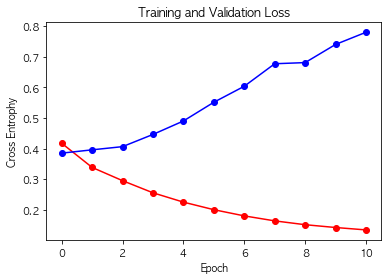

In [40]:
#val_loss가() 올라가면 기본적으로 오버피팅이 되고 있다는 뜻
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Cross Entrophy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

#이거는 오버피팅 


### Save Weight

In [45]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

NotImplementedError: 

In [44]:
import joblib
file_name = 'model.pkl'
joblib.dump(model,file_name)

TypeError: can't pickle _thread._local objects

In [ ]:
#모델 저장 
model.save_weights('nsms_keras_simplelstm')
#이렇게 저장하면 load weight하면 불러올수 있음